#CMPE 258 HW3 - Part B3
Pytorch high level primitives to build neural network of 3d input, 2d output

Abhishek Bais

In [ ]:
# Import packages
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generate 3d input, 2d output

In [ ]:
# Generate 3-d input, 2d output
n = 100
d = 3
r1 = -1
r2 = 1
x = (r1 - r2) * torch.rand((n, d)) + r2

# y = 5x^2 + wx + b
weights_true = torch.tensor([[3., 2., -1.], [2., 3., 1.]]).T
bias_true = torch.tensor([[0.5], [0.5]]).T
#bias_true = torch.tensor([0.5, 0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = torch.mm(5 * x ** 2, weights_true) + torch.mm(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

print('x is: ' + str(x[:2]))
print('y is: ' + str(y_true[:2]))

torch.Size([100, 3]) torch.Size([3, 2]) torch.Size([1, 2])
x: torch.Size([100, 3]), weights: torch.Size([3, 2]), bias: torch.Size([1, 2]), y: torch.Size([100, 2])
x is: tensor([[-0.9259, -0.5369, -0.6144],
        [-0.5770,  0.6284, -0.5263]])
y is: tensor([[11.1166, 11.2063],
        [ 8.1104, 11.3430]])


# Generate a 3d TSNE plot of the data

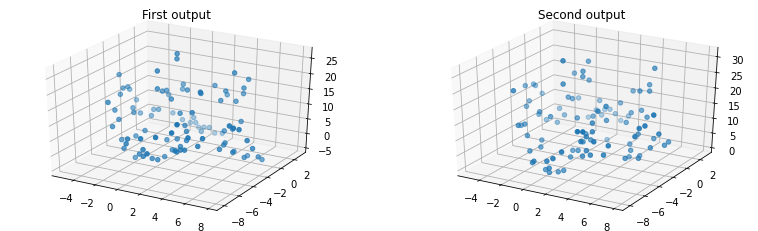

In [ ]:
# Generate 3D TSNE plots for both outputs
def plot_3d(X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)
  fig = plt.figure(figsize=plt.figaspect(0.3))
  
  # plot the first output y[:,0]
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y[:,0], label='y_true')
  ax.set_title("First output")
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred[:,0], label='y_pred', marker='v')
  
  # plot the second output y[:,1]
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y[:,1], label='y_true')
  ax.set_title("Second output")
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred[:,1], label='y_pred', marker='v')
  
plot_3d(x, y_true)

# Build the nueral net

In [ ]:
# Custom Model using nn.Linear modules
class Model(nn.Module):
  # Dump NN
  def dump(self):
    print('Builiding NN:')
    for j, layer in enumerate(self.layers):
      print('---- Layer {} ----'.format(j))
      print(layer)
  
  # Init
  def __init__(self, ni, nh, activation='Linear'):
    super().__init__()
    self_layers = []
    self_layers.append(nn.Linear(ni, nh))
    if (activation == 'Relu'):
      self_layers.append(nn.ReLU())
    self_layers.append(nn.Linear(nh, 5))
    if (activation == 'Relu'):
      self_layers.append(nn.ReLU())
    self_layers.append(nn.Linear(5, 2))
    self.layers = nn.ModuleList(self_layers)

    # Dump the model created
    self.dump()
  
  # Forward propagate
  def forward(self, input):
    o = input
    for l in self.layers:
      o = l.forward(o)
    return o

  # Train model
  def fit(self, x, y_true, lr, num_epochs):
    optimizer = torch.optim.SGD(self.parameters(), lr=lr)
    loss_fn  = nn.MSELoss()
    for epoch in range(num_epochs):
      optimizer.zero_grad()
      y_pred = self.forward(x)
      loss = loss_fn(y_pred, y_true)
      print('Loss: ', loss)
      loss.backward()
      optimizer.step()

# Train neural net with non-linear relu layer

In [ ]:
# Configure hyperparams of model
num_epochs = 40
lr = 0.01
ni = x.shape[1]
nh = 5

In [ ]:
# Train the model
m = Model(ni, nh, activation='Relu')
m.fit(x, y_true, lr, num_epochs)
y_pred = m.forward(x).detach().numpy()

mse = mean_squared_error(y_true, y_pred)
print('Final Loss is ', mse)

Builiding NN:
---- Layer 0 ----
Linear(in_features=3, out_features=5, bias=True)
---- Layer 1 ----
ReLU()
---- Layer 2 ----
Linear(in_features=5, out_features=5, bias=True)
---- Layer 3 ----
ReLU()
---- Layer 4 ----
Linear(in_features=5, out_features=2, bias=True)
Loss:  tensor(137.0679, grad_fn=<MseLossBackward>)
Loss:  tensor(134.8960, grad_fn=<MseLossBackward>)
Loss:  tensor(132.7890, grad_fn=<MseLossBackward>)
Loss:  tensor(130.6263, grad_fn=<MseLossBackward>)
Loss:  tensor(128.4410, grad_fn=<MseLossBackward>)
Loss:  tensor(126.1941, grad_fn=<MseLossBackward>)
Loss:  tensor(123.8668, grad_fn=<MseLossBackward>)
Loss:  tensor(121.4061, grad_fn=<MseLossBackward>)
Loss:  tensor(118.7459, grad_fn=<MseLossBackward>)
Loss:  tensor(115.8086, grad_fn=<MseLossBackward>)
Loss:  tensor(112.4947, grad_fn=<MseLossBackward>)
Loss:  tensor(108.6808, grad_fn=<MseLossBackward>)
Loss:  tensor(104.2207, grad_fn=<MseLossBackward>)
Loss:  tensor(98.9364, grad_fn=<MseLossBackward>)
Loss:  tensor(92.6345,

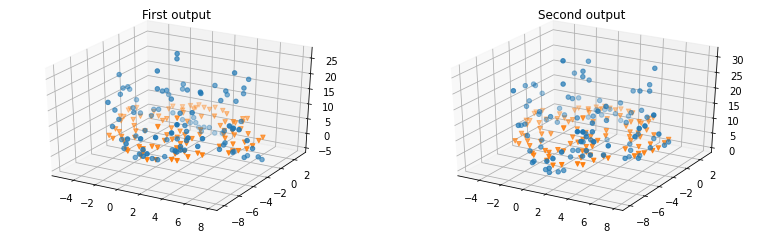

In [ ]:
plot_3d(x, y_true, y_pred)

# Train neural net with only linear layers

In [ ]:
# Train the model
m = Model(ni, nh, activation='Linear')
m.fit(x, y_true, lr, num_epochs)
y_pred = m.forward(x).detach().numpy()

mse = mean_squared_error(y_true, y_pred)
print('Final Loss is ', mse)

Builiding NN:
---- Layer 0 ----
Linear(in_features=3, out_features=5, bias=True)
---- Layer 1 ----
Linear(in_features=5, out_features=5, bias=True)
---- Layer 2 ----
Linear(in_features=5, out_features=2, bias=True)
Loss:  tensor(132.4567, grad_fn=<MseLossBackward>)
Loss:  tensor(128.2039, grad_fn=<MseLossBackward>)
Loss:  tensor(123.7474, grad_fn=<MseLossBackward>)
Loss:  tensor(118.8986, grad_fn=<MseLossBackward>)
Loss:  tensor(113.4816, grad_fn=<MseLossBackward>)
Loss:  tensor(107.3259, grad_fn=<MseLossBackward>)
Loss:  tensor(100.2729, grad_fn=<MseLossBackward>)
Loss:  tensor(92.2082, grad_fn=<MseLossBackward>)
Loss:  tensor(83.1379, grad_fn=<MseLossBackward>)
Loss:  tensor(73.3313, grad_fn=<MseLossBackward>)
Loss:  tensor(63.5055, grad_fn=<MseLossBackward>)
Loss:  tensor(54.8634, grad_fn=<MseLossBackward>)
Loss:  tensor(48.6229, grad_fn=<MseLossBackward>)
Loss:  tensor(45.0957, grad_fn=<MseLossBackward>)
Loss:  tensor(43.4441, grad_fn=<MseLossBackward>)
Loss:  tensor(42.6216, grad_

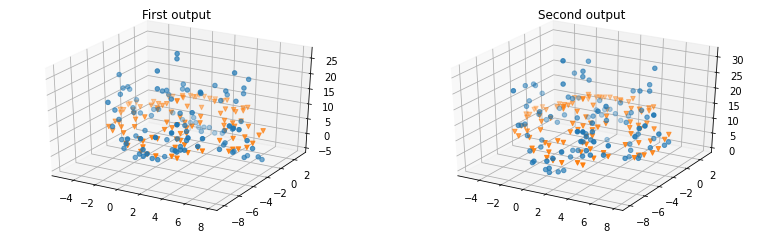

In [ ]:
plot_3d(x, y_true, y_pred)